In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import json
from scipy.signal import argrelextrema
from scipy import ndimage
import ast
from scipy.spatial.distance import cdist
from skvideo import io
from os import listdir
import pandas as pd

/Users/ninawiedemann/anaconda/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)


In [62]:
player_list = [0]
joints_for_cdist = np.arange(0,18,1)
important_joints = [0,1,6,7,8,9,10,11]
def color_video(json_array, vid_file, start = 0, end = 300, printing =None, plotting=True):
    colors = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [255, 0, 255], [0, 255, 255], [0, 170, 255],
              [0, 0, 0], 
          [255, 0, 85], [0, 255, 170],  [0, 170, 255], [0, 85, 255],  [85, 0, 255], 
          [170, 0, 255], [255, 0, 170], [255, 0, 85], [255, 0, 85], [0, 255, 170],  [0, 170, 255], 
              [0, 85, 255],  [85, 0, 255], 
          [170, 0, 255], [255, 0, 170], [255, 0, 85], [255, 0, 85], [0, 255, 170],  [0, 170, 255], [0, 85, 255],  [85, 0, 255], \
          [170, 0, 255], [255, 0, 170], [255, 0, 85]]
    colors_string = ["blue", "green", "red", "tuerkis", "pink", "yellow", "orange", "black", "purple"]
    nr_joints =12
    #print(json_array.shape)
    #writer = cv2.VideoWriter("/Users/ninawiedemann/Desktop/UNI/Praktikum/high_quality_testing/outputs_example/test.avi",cv2.VideoWriter_fourcc(*"XVID") , 20, (500,800))

    #writer = io.FFmpegWriter("/Users/ninawiedemann/Desktop/UNI/Praktikum/high_quality_testing/outputs_example/test.avi", (10,800,500,3))
    #writer.open()
    video_capture = cv2.VideoCapture(vid_file)
    arr = [] #np.zeros((100,800,500,3))

    # fig = plt.figure(figsize=(5, 15)) # for subplots

    ret, frame = video_capture.read()

    all_peaks = np.array(json_array[0])
    #print(all_peaks.shape)
    canvas = frame[:600,:500] #[top_b:bottom_b, left_b:right_b] # cv2.imread(f) # B,G,R order
    # oriImg = canvas.copy()
    print(all_peaks.shape)

    for i in range(len(all_peaks)):
        print("person", all_peaks[i])
        for j in range(len(all_peaks[i])):
            if i==2:
                print((int(all_peaks[i,j,1]),int(all_peaks[i,j,0])))
            cv2.circle(canvas, (int(all_peaks[i,j,1]),int(all_peaks[i,j,0])) , 4, colors[i], thickness=-1)

    #to_plot = cv2.addWeighted(oriImg, 0.3, canvas, 0.7, 0)
    #arr.append(to_plot[:,:,[2,1,0]])
    if plotting:
        width, height, _ = canvas.shape
        print(width,height)
        plt.figure(figsize = (width/float(100), height/float(100)))
        plt.imshow(canvas)
        #fig = matplotlib.pyplot.gcf()
        #fig.set_size_inches(12, 12)
        plt.show()

    """
    # for subplots
    ax = fig.add_subplot(end-start,1, k-start+1)
        plt.imshow(to_plot[:,:,[2,1,0]])
        plt.title("frame "+str(k))
        
    plt.tight_layout()
    plt.show()
    """
    arr = np.array(arr)
    return arr




#5 RHP Matt Blais (4)
3
(3, 18, 2)
person [[  246.   1823.5]
 [  246.   1849. ]
 [  270.5  1798.5]
 [  318.   1777.5]
 [  270.5  1895.5]
 [  318.   1896. ]
 [  295.   1825. ]
 [  391.5  1824.5]
 [  466.   1826. ]
 [  295.   1848.5]
 [  391.5  1871. ]
 [  465.5  1871.5]
 [  222.5  1827.5]
 [  198.   1827. ]
 [  198.   1824. ]
 [  198.   1848.5]
 [  197.5  1869. ]
 [  222.5  1822. ]]
person [[ 346.   413. ]
 [ 345.5  479. ]
 [ 393.5  365. ]
 [ 415.   363.5]
 [ 393.5  501.5]
 [ 417.   458.5]
 [ 442.5  435.5]
 [ 613.   431. ]
 [ 759.5  431. ]
 [ 442.   463. ]
 [ 612.   507. ]
 [ 758.5  528. ]
 [ 322.   437. ]
 [ 297.   434. ]
 [ 295.5  432. ]
 [ 297.   455.5]
 [ 295.5  477.5]
 [ 320.5  409. ]]
person [[ 200.5  218.5]
 [ 200.   264. ]
 [ 225.5  193.5]
 [ 272.5  191.5]
 [ 225.   288. ]
 [ 271.5  289. ]
 [ 268.   240. ]
 [ 365.5  237.5]
 [ 442.   235.5]
 [ 248.5  263.5]
 [ 345.5  285.5]
 [ 441.5  284.5]
 [ 196.5  241. ]
 [ 192.5  240.5]
 [ 192.   239.5]
 [ 191.5  242. ]
 [ 191.5  264. ]
 [ 19

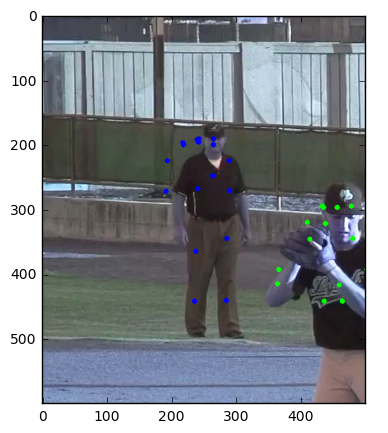

In [63]:
path = "/Users/ninawiedemann/Desktop/UNI/Praktikum/high_quality_testing/"
outputs = path + "handle_one/"
argmin_list = []
with open("/Users/ninawiedemann/Desktop/UNI/Praktikum/high_quality_testing/center_dics.json", "r") as infile:
    dictionary = json.load(infile)
# df = pd.read_csv("/Users/ninawiedemann/Desktop/UNI/Praktikum/high_quality_testing/handle_one/"+name+".csv", dtype = {"Frame": np.int32, "Batter": np.ndarray})
for json_file in ["#5 RHP Matt Blais (4).json"]:
    name = json_file[:-5]
    if json_file[-5:]!= ".json" or name+".mp4" in outputs:
        continue
    print(name)
    with open(path +"test_multiplier"+".json", "r") as infile:
        handle_one_arr = json.load(infile)

    if name+".mp4" in listdir(path+"batter"):
        f = path+"batter/"+name+".mp4"
    else:
        f = path+"pitcher/"+name+".mp4"
    print(len(handle_one_arr))


    """    
    for i in range(len(handle_one_arr)):
        handle_one_arr[i]=np.array(handle_one_arr[i])

    print(handle_one_arr[0].shape)

    df_handle = [handle_one_arr, handle_one_arr.copy()]

    center = [dictionary[name][1],dictionary[name][0]] 
    new_df = np.array(df_coordinates(df_handle, np.array([center]), player_list)[1])
    print("out_df", np.array(new_df).shape)
    """

    arr = color_video(handle_one_arr, f, start = 0, end = 4 )#len(handle_one_arr)) #, printing = argmin_list)
    # skvideo.io.vwrite("/Users/ninawiedemann/Desktop/UNI/Praktikum/high_quality_testing/handle_one_bsp.mp4", arr)
    # arr2 = color_video(new_df[:,:12,:], f, start = 0, end =len(new_df), printing = None, plotting=True)
    #io.vwrite("/Users/ninawiedemann/Desktop/UNI/Praktikum/high_quality_testing/handle_one/"+name+".mp4", arr2)